In [3]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

무게,길이,대각선,높이,넓이 - 어떤 물고기인지 분류하는 모델을 구현

도미 - Bream, 빙어 - Smelt

In [4]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [22]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [23]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [24]:
df.shape

(159, 6)

In [25]:
df.iloc[40:42]

,Species,Weight,Length,Diagonal,Height,Width
40,Roach,0.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,20.8,23.1,6.1677,3.3957


In [26]:
df['Weight'].sort_values()

40        0.0
72        5.9
145       6.7
147       7.0
146       7.5
        ...  
125    1100.0
141    1250.0
143    1550.0
142    1600.0
144    1650.0
Name: Weight, Length: 159, dtype: float64

In [27]:
# 정답으로 분류하는 물고기 - 7개
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [28]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [29]:
# 데이터 전처리
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [30]:
df.iloc[:,1:].head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [31]:
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [32]:
# 데이터 전처리 - data,target 세트 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

In [33]:
# 데이터 전처리 - train,test세트 분리
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    fish_input,fish_target, random_state=42
)

In [35]:
# knn 모델을 적용
# 데이터변환 - fit,transform
# 데이터측정 - 분류,회귀 fit,predict,score
# 1. 표준화작업 - (data-평균)/표준편차

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터 학습시키기

# n_neighbors=5
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# 데이터 예측하기
# 데이터 정답률 구하기
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [47]:
test_scaled.shape

(40, 5)

In [49]:
# target속성 - 7개
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [48]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [51]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [52]:
# predict : 분류한 값을 출력
# predict_proba : 각 특성별로 분류 퍼센트를 출력
proba = kn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [56]:
test_scaled[3]

array([-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464])

In [55]:
test_scaled[3:4]

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [57]:
# n_neighbors 의 주소값 출력
distances,indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[104, 115, 106]], dtype=int64)

In [58]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [60]:
# n_neighbors 의 주소값 출력
distances,indexes = kn.kneighbors(test_scaled[0:1])
train_target[indexes]

array([['Perch', 'Perch', 'Perch']], dtype=object)

knn분류 이미 사용한 것임.


로지스틱 회귀 - 분류

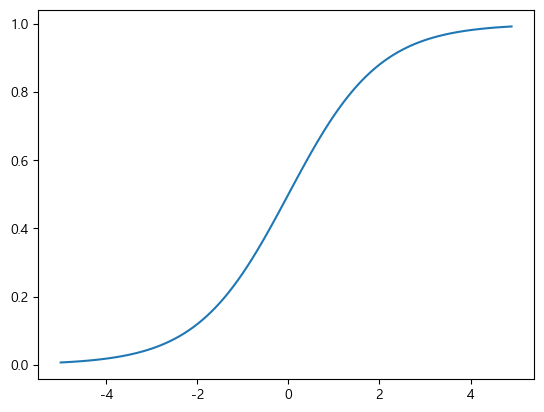

In [63]:
z = np.arange(-5,5,0.1) # -5,5까지 0.1단위로 배열생성

# 시그모이드 함수
phi = 1 / (1 + np.exp(-z))

# 그래프 출력 - 100개 직선
plt.plot(z,phi)
plt.show()


In [64]:
# 로지스틱 회귀로 이진 분류 
char_arr = np.array(['A','B','C','D','E','A','B','C'])
# A,C 데이터 뽑아오려면
char_arr[[True,False,True,False,False,True,False,True]]

array(['A', 'C', 'A', 'C'], dtype='<U1')

In [ ]:
df[df=='A' | df=='C']

In [70]:
(df['Species']=='Bream') | (df['Species']=='Smelt')

0      True
1      True
2      True
3      True
4      True
       ... 
154    True
155    True
156    True
157    True
158    True
Name: Species, Length: 159, dtype: bool

In [5]:
# 이진분류형태, 다항분류 형태로 해서 분류모델을 적용 시켜봄.
b_s_df = df[(df['Species']=='Bream') | (df['Species']=='Smelt')]

In [12]:
# 로지스틱 회귀 모델을 적용해서 정답률을 출력하시오.
# train 정답률, test정답률 출력하시오.
b_s_df.head(2)


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


In [14]:
f_input = b_s_df.iloc[:,1:].to_numpy()
f_target = b_s_df['Species'].to_numpy()

In [15]:
# train,test
train_input,test_input,train_target,test_target = train_test_split(
    f_input,f_target,random_state=42
)

In [21]:
train_input

array([[ 450.    ,   30.    ,   35.1   ,   14.0049,    4.8438],
       [ 363.    ,   29.    ,   33.5   ,   12.73  ,    4.4555],
       [ 500.    ,   29.7   ,   34.5   ,   14.1795,    5.2785],
       [   8.7   ,   11.3   ,   12.6   ,    1.9782,    1.2852],
       [  10.    ,   11.8   ,   13.1   ,    2.2139,    1.2838],
       [  12.2   ,   13.    ,   13.8   ,    2.277 ,    1.2558],
       [ 600.    ,   32.    ,   37.2   ,   15.438 ,    5.58  ],
       [ 500.    ,   30.7   ,   36.2   ,   14.2266,    4.9594],
       [ 700.    ,   33.    ,   38.3   ,   14.8604,    5.2854],
       [ 700.    ,   35.    ,   40.5   ,   16.2405,    5.589 ],
       [ 975.    ,   41.    ,   45.9   ,   18.6354,    6.7473],
       [ 920.    ,   38.5   ,   44.1   ,   18.0369,    6.3063],
       [ 242.    ,   25.4   ,   30.    ,   11.52  ,    4.02  ],
       [   9.8   ,   12.    ,   13.2   ,    2.2044,    1.1484],
       [ 925.    ,   39.5   ,   45.3   ,   18.7542,    6.7497],
       [ 450.    ,   29.7   ,   34.7   ,

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [25]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

1.0
1.0


In [27]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [28]:
lr.predict(train_scaled[:5])

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [26]:
print(lr.predict_proba(train_scaled[:5]))

[[0.97781589 0.02218411]
 [0.95701776 0.04298224]
 [0.98230024 0.01769976]
 [0.04076162 0.95923838]
 [0.04518953 0.95481047]]


In [30]:
df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [29]:
# 로지스틱 회귀 - 선을 가지고 있음, 기울기, y절편
# 각각의 특성의 기울기 존재, 특성 5개
lr.coef_, lr.intercept_

(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

In [32]:
train_scaled[0]

array([0.09920189, 0.37460577, 0.41303385, 0.46524998, 0.37261369])

In [33]:
z = 0.09920189*-0.57717269 + 0.37460577*-0.79233938 + 0.41303385*-0.82533982 + 0.46524998*-0.86579233 + 0.37261369*-0.82205625 - 2.38186126
z 

-3.7859453455802297

In [31]:
decisions = lr.decision_function(train_scaled[:5])
decisions

array([-3.78594535, -3.10303503, -4.01634616,  3.15839875,  3.0506475 ])

In [35]:
# 시그모이드 함수
# phi = 1 / (1 + np.exp(-z))


In [37]:
from scipy.special import expit

# 시그모이드 함수를 적용
expit(decisions)

array([0.02218411, 0.04298224, 0.01769976, 0.95923838, 0.95481047])

In [ ]:
# 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'
[0.02218411, 0.04298224, 0.01769976, 0.95923838, 0.95481047]

In [ ]:
#  [0.97781589 0.02218411]
#  [0.95701776 0.04298224]
#  [0.98230024 0.01769976]
#  [0.04076162 0.95923838]
#  [0.04518953 0.95481047]